# Making of Imbalanced Dataset

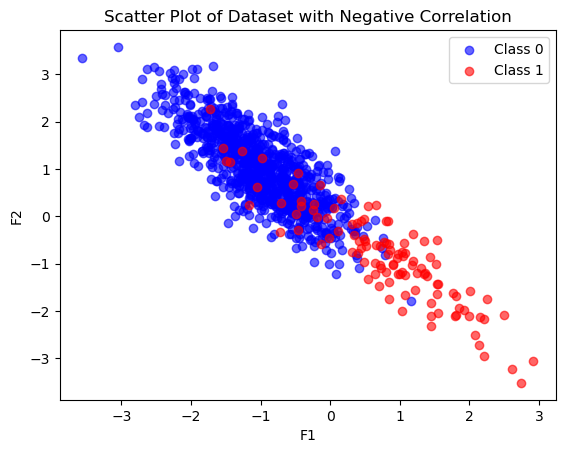

In [1]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate the dataset
X, y = make_classification(
    n_samples=1000,        # Total number of samples
    n_features=2,          # Number of features
    n_informative=1,       # Number of informative features
    n_redundant=0,         # Number of redundant features
    n_clusters_per_class=1, # Clusters per class
    weights=[0.9, 0.1],    # Imbalanced dataset (90% Class 0, 10% Class 1)
    random_state=42        # Random seed for reproducibility
)

# Make Feature 1 and Feature 2 negatively correlated
X[:, 1] = -X[:, 0] + np.random.normal(0, 0.5, size=X.shape[0])

# Create a DataFrame
df = pd.DataFrame(X, columns=["F1", "F2"])
df["Target"] = y

# Scatter plot
plt.scatter(df[df["Target"] == 0]["F1"], df[df["Target"] == 0]["F2"], label="Class 0", alpha=0.6, color="blue")
plt.scatter(df[df["Target"] == 1]["F1"], df[df["Target"] == 1]["F2"], label="Class 1", alpha=0.6, color="red")
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Scatter Plot of Dataset with Negative Correlation")
plt.legend()
plt.show()


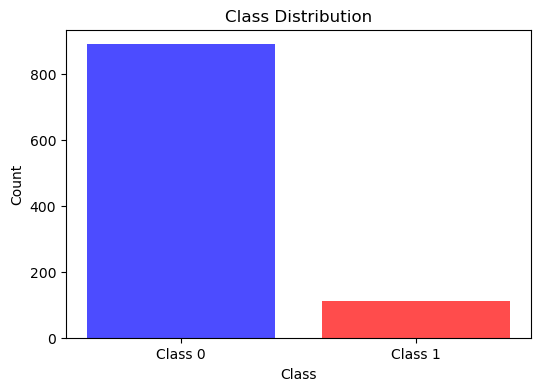

In [3]:
# Bar chart for class distribution
class_counts = df["Target"].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=["blue", "red"], alpha=0.7)
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


# Resampling the data : Upsampling 


In [8]:
# Upsample the data 
from sklearn.utils import resample


In [12]:
# Seperate the Classes 
df_class_0 = df[df["Target"]==0]
df_class_1 = df[df["Target"]==1]
print(df_class_0.shape,df_class_1.shape)


(889, 3) (111, 3)


In [22]:
df_class1_up = resample(df_class_1,replace=True,n_samples=len(df_class_0),random_state=1)
df_class1_up.shape

(889, 3)

In [30]:
df_balanced = pd.concat([df_class1_up,df_class_0],axis=0)

In [32]:
df_balanced.shape

(1778, 3)

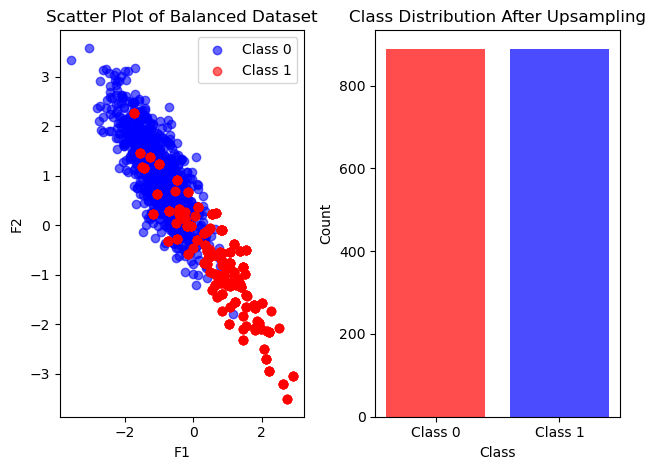

In [34]:
# Subplot 1: Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df_balanced[df_balanced["Target"] == 0]["F1"], 
            df_balanced[df_balanced["Target"] == 0]["F2"], 
            label="Class 0", alpha=0.6, color="blue")
plt.scatter(df_balanced[df_balanced["Target"] == 1]["F1"], 
            df_balanced[df_balanced["Target"] == 1]["F2"], 
            label="Class 1", alpha=0.6, color="red")
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Scatter Plot of Balanced Dataset")
plt.legend()

# Subplot 2: Bar chart
plt.subplot(1, 2, 2)
class_counts = df_balanced["Target"].value_counts()
plt.bar(class_counts.index, class_counts.values, color=["blue", "red"], alpha=0.7)
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution After Upsampling")

# Show the plots
plt.tight_layout()
plt.show()

In [38]:
# Resampling the data : Downsampling 

In [44]:
df_class0_dwn = resample(df_class_0,replace=True,n_samples=len(df_class_1),random_state=1)


In [46]:
df_balanced_2 = pd.concat([df_class0_dwn,df_class_1],axis = 0)


In [50]:
df_balanced_2.shape

(222, 3)

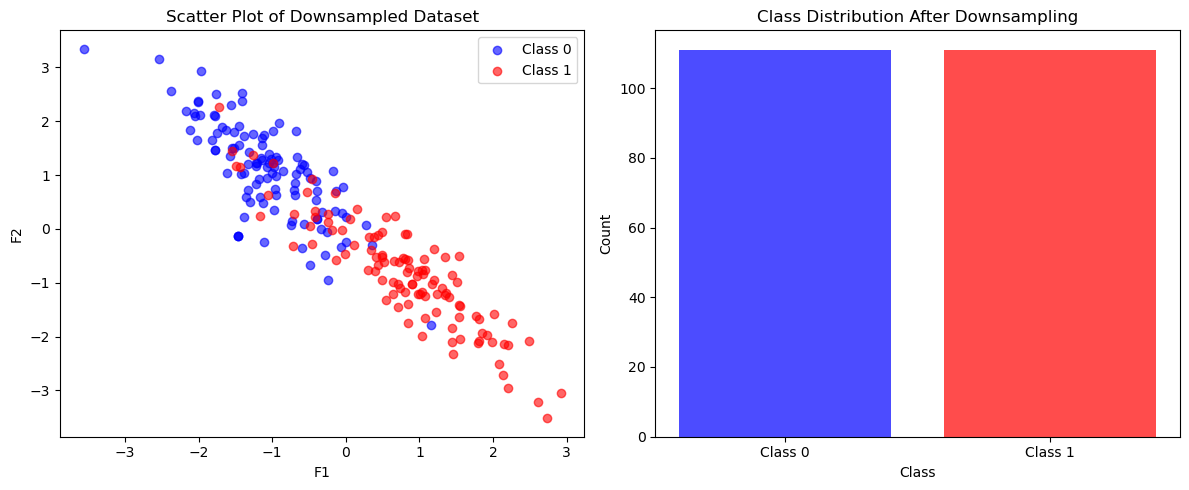

In [52]:
# Scatter plot and bar chart side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df_balanced_2[df_balanced_2["Target"] == 0]["F1"], 
            df_balanced_2[df_balanced_2["Target"] == 0]["F2"], 
            label="Class 0", alpha=0.6, color="blue")
plt.scatter(df_balanced_2[df_balanced_2["Target"] == 1]["F1"], 
            df_balanced_2[df_balanced_2["Target"] == 1]["F2"], 
            label="Class 1", alpha=0.6, color="red")
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Scatter Plot of Downsampled Dataset")
plt.legend()

# Subplot 2: Bar chart
plt.subplot(1, 2, 2)
class_counts = df_balanced_2["Target"].value_counts()
plt.bar(class_counts.index, class_counts.values, color=["blue", "red"], alpha=0.7)
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution After Downsampling")

# Show the plots
plt.tight_layout()
plt.show()

#  Resampling : Oversampling by SMOTE

In [55]:
from imblearn.over_sampling import SMOTE

In [61]:
X = df[["F1","F2"]]
y = df["Target"]

In [63]:
smote = SMOTE(random_state = 42)

In [67]:
X_smote,y_smote = smote.fit_resample(X,y)

In [69]:
df_smote = pd.DataFrame(X_smote, columns = ["F1","F2"])

In [71]:
df_smote["Target"] = y_smote

In [75]:
print(df_smote["Target"].value_counts())

Target
0    889
1    889
Name: count, dtype: int64
